The following additional libraries are needed to run this
notebook. Note that running on Colab is experimental, please report a Github
issue if you have any problem.

In [ ]:
!pip install d2l==0.17.1


# Cálculo
:label:`sec_calculus`

Encontrar a área de um polígono permaneceu um mistério
até pelo menos 2.500 anos atrás, quando os gregos antigos dividiam um polígono em triângulos e somavam suas áreas.
Para encontrar a área de formas curvas, como um círculo,
os gregos antigos inscreviam polígonos nessas formas.
Conforme mostrado em :numref: `fig_circle_area`,
um polígono inscrito com mais lados de igual comprimento se aproxima melhor
o circulo. Este processo também é conhecido como *método de exaustão*.

![Buscando a área de um círculo através do método de exaustão.](../img/polygon-circle.svg)
:label:`fig_circle_area`


Na verdade, o método de exaustão é de onde o *cálculo integral* (será descrito em :numref: `sec_integral_calculus`) se origina.
Mais de 2.000 anos depois,
o outro ramo do cálculo, *cálculo diferencial*,
foi inventado.
Entre as aplicações mais críticas do cálculo diferencial,
problemas de otimização consideram como fazer algo *o melhor*.
Conforme discutido em :numref:`subsec_norms_and_objectives`,
tais problemas são onipresentes em *Deep Learning*.

Em *Deep Learning*, nós *treinamos* modelos, atualizando-os sucessivamente
para que fiquem cada vez melhores à medida que veem mais e mais dados.
Normalmente, melhorar significa minimizar uma *função de perda*,
uma pontuação que responde à pergunta "quão *ruim* é o nosso modelo?"
Esta pergunta é mais sutil do que parece.
Em última análise, o que realmente nos preocupa
está produzindo um modelo com bom desempenho em dados
que nunca vimos antes.
Mas só podemos ajustar o modelo aos dados que podemos realmente ver.
Assim, podemos decompor a tarefa de ajustar os modelos em duas preocupações principais:
i) *otimização*: processo de adequação de nossos modelos aos dados observados;
ii) *generalização*: os princípios matemáticos e a sabedoria dos profissionais
que guia sobre como produzir modelos cuja validade se estende
além do conjunto exato de exemplos de dados usados para treiná-los.

Para te ajudar a entender
problemas e métodos de otimização em capítulos posteriores,
aqui, damos uma breve introdução ao cálculo diferencial
que é comumente usado no *Deep Learning*.

## Derivadas e Diferenciação

Começamos abordando o cálculo de derivadas,
uma etapa crucial em quase todos os algoritmos de otimização de *Deep Learning*.
No *Deep Learning*, normalmente escolhemos funções de perda
que são diferenciáveis em relação aos parâmetros do nosso modelo.
Simplificando, isso significa que para cada parâmetro,
podemos determinar a rapidez com que a perda aumentaria ou diminuiria,
deveríamos *aumentar* ou *diminuir* esse parâmetro
por uma quantidade infinitesimalmente pequena.

Suponha que temos uma função $f: \mathbb{R} \rightarrow \mathbb{R}$,
cuja entrada e saída são escalares.
[**A *derivada* de $f$ é definida como**]


(**$$f'(x) = \lim_{h \rightarrow 0} \frac{f(x+h) - f(x)}{h},$$**)
:eqlabel:`eq_derivative`


se este limite existe.
Se $f'(a)$ existe,
Diz-se que $f$ é *diferenciável* em  $a$.
Se $f$ é diferenciável a cada número de um intervalo,
então esta função é diferenciável neste intervalo.
Podemos interpretar a derivada $f '(x)$ em :eqref:`eq_derivative`
como a taxa de variação *instantânea* de $f (x)$
em relação a $x$.
A chamada taxa instantânea de mudança é baseada em
a variação $h$ em $x$, que se aproxima de $0$.

Para ilustrar derivadas,
vamos experimentar com um exemplo.
(**Define-se $u = f(x) = 3x^2-4x$.**)


In [1]:
%matplotlib inline
import numpy as np
from IPython import display
from d2l import torch as d2l


def f(x):
    return 3 * x ** 2 - 4 * x

[**Definindo $x = 1$ e deixando $h$ se aproximar de $0$,
o resultado numérico de $\frac{f(x+h) - f(x)}{h}$**]
in: eqref: `eq_derivative`
(**aproxima-se de $2$.**)
Embora este experimento não seja uma prova matemática,
veremos mais tarde que a derivada $u '$ é $2$ quando $x = 1$.


In [2]:
def numerical_lim(f, x, h):
    return (f(x + h) - f(x)) / h

h = 0.1
for i in range(5):
    print(f'h={h:.5f}, numerical limit={numerical_lim(f, 1, h):.5f}')
    h *= 0.1

h=0.10000, numerical limit=2.30000
h=0.01000, numerical limit=2.03000
h=0.00100, numerical limit=2.00300
h=0.00010, numerical limit=2.00030
h=0.00001, numerical limit=2.00003


Vamos nos familiarizar com algumas notações equivalentes para derivadas.
Dado $y = f (x)$, onde $x$ e $y$ são a variável independente e a variável dependente da função $f$, respectivamente. As seguintes expressões são equivalentes:

$$f'(x) = y' = \frac{dy}{dx} = \frac{df}{dx} = \frac{d}{dx} f(x) = Df(x) = D_x f(x),$$

onde os símbolos $\frac{d}{dx}$ e $D$  são *operadores de diferenciação* que indicam operação de *diferenciação*.
Podemos usar as seguintes regras para diferenciar funções comuns:

* $DC = 0$ ($C$ é uma constante),
* $Dx^n = nx^{n-1}$ (uma exponenciação, $n$ é qualquer valor real),
* $De^x = e^x$,
* $D\ln(x) = 1/x.$

Para diferenciar uma função que é formada de algumas funções mais simples, como as funções comuns acima,
as regras a seguir podem ser úteis para nós.
Suponha que as funções $f$ e $g$ sejam diferenciáveis e $C$ seja uma constante,
temos a *regra múltipla constante*

$$\frac{d}{dx} [Cf(x)] = C \frac{d}{dx} f(x),$$

a *regra da soma*

$$\frac{d}{dx} [f(x) + g(x)] = \frac{d}{dx} f(x) + \frac{d}{dx} g(x),$$

a *regra do produto*

$$\frac{d}{dx} [f(x)g(x)] = f(x) \frac{d}{dx} [g(x)] + g(x) \frac{d}{dx} [f(x)],$$

e a *regra do quociente*

$$\frac{d}{dx} \left[\frac{f(x)}{g(x)}\right] = \frac{g(x) \frac{d}{dx} [f(x)] - f(x) \frac{d}{dx} [g(x)]}{[g(x)]^2}.$$

Agora podemos aplicar algumas das regras acima para encontrar
$u' = f'(x) = 3 \frac{d}{dx} x^2-4\frac{d}{dx}x = 6x-4$.
Assim, definindo $x = 1$, temos $u '= 2$:
isso é apoiado por nosso experimento anterior nesta seção
onde o resultado numérico se aproxima de $2$.
Esta derivada também é a inclinação da linha tangente
para a curva $u = f (x)$ quando $x = 1$.

[**Para visualizar tal interpretação das derivadas,
usaremos `matplotlib`,**]
uma biblioteca de plotagem popular em Python.
Para configurar as propriedades das figuras produzidas por `matplotlib`,
precisamos definir algumas funções.
Na sequência,
a função `use_svg_display` especifica o pacote` matplotlib` para produzir os números SVG para imagens mais nítidas.
Observe que o comentário `# @ save` é uma marca especial onde a seguinte função,
classe, ou instruções são salvas no pacote `d2l`
então, mais tarde, eles podem ser chamados diretamente (por exemplo, `d2l.use_svg_display ()`) sem serem redefinidos.


In [3]:
def use_svg_display():  #@save
    """Use the svg format to display a plot in Jupyter."""
    display.set_matplotlib_formats('svg')

Definimos a função `set_figsize` para especificar o tamanho das figuras. Observe que aqui usamos diretamente `d2l.plt`, uma vez que a instrução import` from matplotlib import pyplot as plt` foi marcada para ser salva no pacote `d2l` no prefácio.


In [4]:
def set_figsize(figsize=(3.5, 2.5)):  #@save
    """Set the figure size for matplotlib."""
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize

A seguinte função `set_axes` define as propriedades dos eixos das figuras produzidas por` matplotlib`.


In [5]:
#@save
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """Set the axes for matplotlib."""
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

Com essas três funções para configurações de figura,
nós definimos a função `plot`
para traçar várias curvas sucintamente
uma vez que precisaremos visualizar muitas curvas ao longo do livro.


In [6]:
#@save
def plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """Plot data points."""
    if legend is None:
        legend = []

    set_figsize(figsize)
    axes = axes if axes else d2l.plt.gca()

    # Return True if `X` (tensor or list) has 1 axis
    def has_one_axis(X):
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
                and not hasattr(X[0], "__len__"))

    if has_one_axis(X):
        X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

Agora podemos [**plotar a função $u = f (x)$ e sua linha tangente $y = 2x - 3$ em $x = 1$**], onde o coeficiente $2$ é a inclinação da linha tangente .


/tmp/ipykernel_104167/77894834.py:3: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


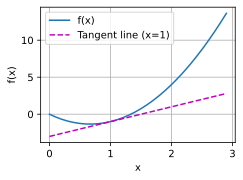

In [7]:
x = np.arange(0, 3, 0.1)
plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

## Derivadas Parciais

Até agora, lidamos com a diferenciação de funções de apenas uma variável.
No *Deep Learning*, as funções geralmente dependem de *muitas* variáveis.
Portanto, precisamos estender as idéias de diferenciação para essas funções *multivariadas*.

Seja $y = f(x_1, x_2, \ldots, x_n)$ uma função com $n$ variáveis. A *derivada parcial* de $y$ em relação ao seu $i ^ \mathrm {th}$ parâmetro $x_i$ é

$$ \frac{\partial y}{\partial x_i} = \lim_{h \rightarrow 0} \frac{f(x_1, \ldots, x_{i-1}, x_i+h, x_{i+1}, \ldots, x_n) - f(x_1, \ldots, x_i, \ldots, x_n)}{h}.$$

Para calcular $\frac{\partial y}{\partial x_i}$, podemos simplesmente tratar $x_1, \ldots, x_{i-1}, x_{i+1}, \ldots, x_n$ como constantes e calcular a derivada de $y$ com respeito a $x_i$.
Para notação de derivadas parciais, os seguintes são equivalentes:

$$\frac{\partial y}{\partial x_i} = \frac{\partial f}{\partial x_i} = f_{x_i} = f_i = D_i f = D_{x_i} f.$$


## Gradientes

Podemos concatenar derivadas parciais de uma função multivariada com respeito a todas as suas variáveis para obter o vetor *gradiente* da função.
Suponha que a entrada da função $f: \mathbb{R}^n \rightarrow \mathbb{R}$ seja um vetor $n$ -dimensional $\mathbf{x} = [x_1, x_2, \ldots, x_n]^\top$ e a saída é um escalar. O gradiente da função $f(\mathbf{x})$ em relação a $\mathbf {x}$ é um vetor de $n$ derivadas parciais:

$$\nabla_{\mathbf{x}} f(\mathbf{x}) = \bigg[\frac{\partial f(\mathbf{x})}{\partial x_1}, \frac{\partial f(\mathbf{x})}{\partial x_2}, \ldots, \frac{\partial f(\mathbf{x})}{\partial x_n}\bigg]^\top,$$

onde $\nabla_{\mathbf{x}} f(\mathbf{x})$ é frequentemente substituído por $\nabla f(\mathbf{x})$ quando não há ambiguidade.

Seja $\mathbf {x}$ um vetor $n$ -dimensional, as seguintes regras são freqüentemente usadas ao diferenciar funções multivariadas:

* For all $\mathbf{A} \in \mathbb{R}^{m \times n}$, $\nabla_{\mathbf{x}} \mathbf{A} \mathbf{x} = \mathbf{A}^\top$,
* For all  $\mathbf{A} \in \mathbb{R}^{n \times m}$, $\nabla_{\mathbf{x}} \mathbf{x}^\top \mathbf{A}  = \mathbf{A}$,
* For all  $\mathbf{A} \in \mathbb{R}^{n \times n}$, $\nabla_{\mathbf{x}} \mathbf{x}^\top \mathbf{A} \mathbf{x}  = (\mathbf{A} + \mathbf{A}^\top)\mathbf{x}$,
* $\nabla_{\mathbf{x}} \|\mathbf{x} \|^2 = \nabla_{\mathbf{x}} \mathbf{x}^\top \mathbf{x} = 2\mathbf{x}$.

Da mesma forma, para qualquer matriz $\mathbf {X}$, temos $\nabla_{\mathbf{X}} \|\mathbf{X} \|_F^2 = 2\mathbf{X}$. Como veremos mais tarde, os gradientes são úteis para projetar algoritmos de otimização em *deep learning*.

## Regra da Cadeia

No entanto, esses gradientes podem ser difíceis de encontrar.
Isso ocorre porque as funções multivariadas no *deep learning* são frequentemente *compostas*,
portanto, não podemos aplicar nenhuma das regras mencionadas acima para diferenciar essas funções.
Felizmente, a *regra da cadeia* nos permite diferenciar funções compostas.

Vamos primeiro considerar as funções de uma única variável.
Suponha que as funções $y = f (u)$ e $u = g (x)$ sejam diferenciáveis, então a regra da cadeia afirma que

$$\frac{dy}{dx} = \frac{dy}{du} \frac{du}{dx}.$$

Agora, vamos voltar nossa atenção para um cenário mais geral
onde as funções têm um número arbitrário de variáveis.
Suponha que a função diferenciável $y$ tenha variáveis
$u_1, u_2, \ldots, u_m$, onde cada função diferenciável $u_i$
tem variáveis $x_1, x_2, \ldots, x_n$.
Observe que $y$ é uma função de $x_1, x_2, \ldots, x_n$.
Então a regra da cadeia será

$$\frac{dy}{dx_i} = \frac{dy}{du_1} \frac{du_1}{dx_i} + \frac{dy}{du_2} \frac{du_2}{dx_i} + \cdots + \frac{dy}{du_m} \frac{du_m}{dx_i}$$

para qualquer $i = 1, 2, \ldots, n$.



## Sumário

* Cálculo diferencial e cálculo integral são dois ramos do cálculo, onde o primeiro pode ser aplicado aos problemas de otimização onipresentes no *deep learning*.
* Uma derivada pode ser interpretada como a taxa instantânea de mudança de uma função em relação à sua variável. É também a inclinação da linha tangente à curva da função.
* Um gradiente é um vetor cujos componentes são as derivadas parciais de uma função multivariada com respeito a todas as suas variáveis.
* A regra da cadeia nos permite diferenciar funções compostas.

## Exercícios

1. Trace a função $y = f(x) = x^3 - \frac{1}{x}$ e sua linha tangente quando $x = 1$.
1. Encontre o gradiente da função $f(\mathbf{x}) = 3x_1^2 + 5e^{x_2}$.
1. Qual é o gradiente da função $f(\mathbf{x}) = \|\mathbf{x}\|_2$?
1. Você pode escrever a regra da cadeia para o caso em que $u = f(x, y, z)$ e $x = x(a, b)$, $y = y(a, b)$, e $z = z(a, b)$?


[Discussions](https://discuss.d2l.ai/t/33)


<!--stackedit_data:
eyJoaXN0b3J5IjpbNDc2NzU1MTgzLC0zNjg5NTY3OTMsOTg3MD
k5NTQxLDU2NTI2MDY0NCwtMTk3OTMzNTgyN119
-->
